In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [6]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [7]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


When do we use standard scaler and when do we use Minmaxscaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [11]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [12]:
scaled_df = pd.DataFrame(scaled_data,columns= df_w_dummies.columns)

In [13]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


Visualizing the minmax scaled values

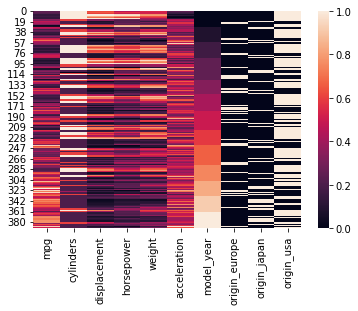

In [48]:
sns.heatmap(scaled_df)
plt.savefig('scaled_values.png')

Dendogram Visualization

The important thing to be noted is that we are interested in clustering the rows(data points) and not the features

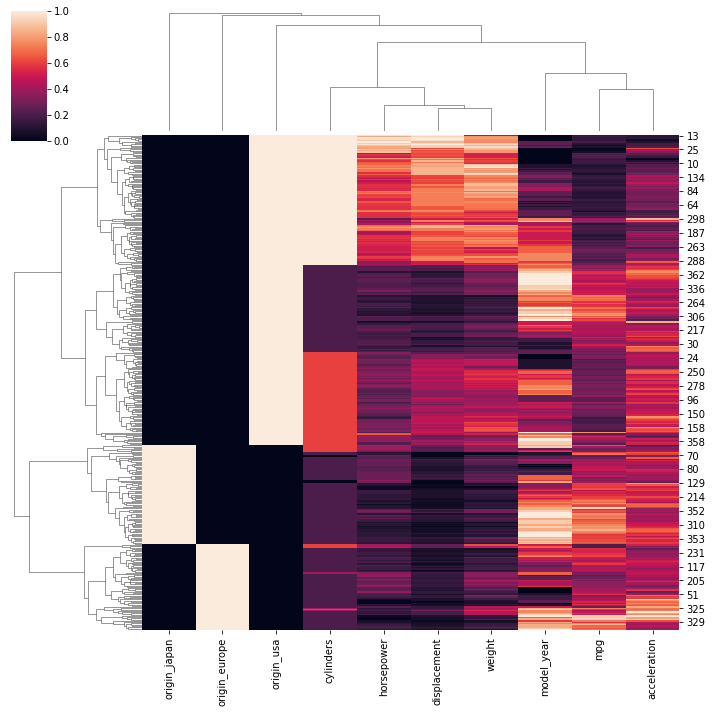

In [47]:
sns.clustermap(scaled_df)
plt.savefig('scaled_points.png')

Only clustering the features

It is recommended to remove dummy variables while clustering

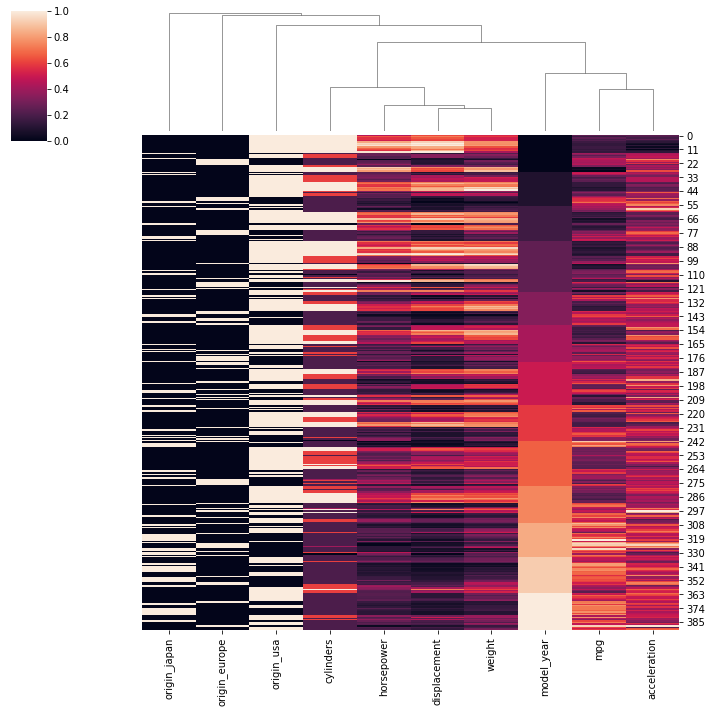

In [16]:
sns.clustermap(scaled_df,row_cluster=False)

Dendograms for the rows

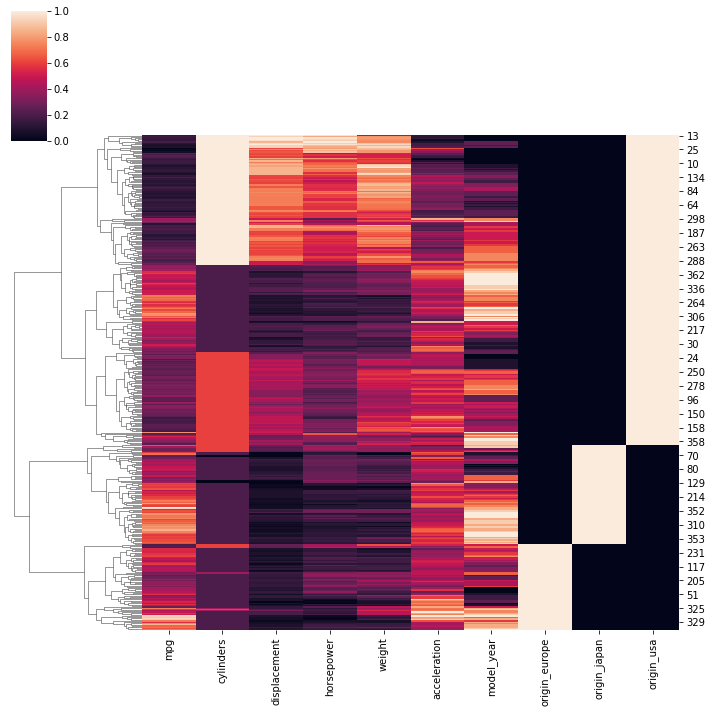

In [49]:
sns.clustermap(scaled_df,col_cluster=False)
plt.savefig('seaborn_dendrograms.png')

This method can only be used for smaller datasets

Model Building

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model = AgglomerativeClustering(n_clusters=4)

In [20]:
cluster_labels = model.fit_predict(scaled_df)

In [21]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

trying to figure out what is separating out the clusters

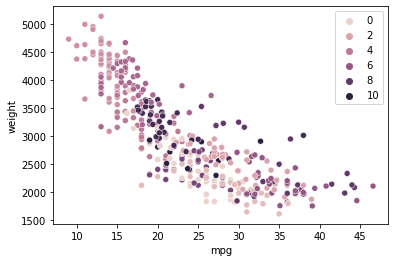

In [50]:
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)
plt.savefig('features vs cluster label.png')

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

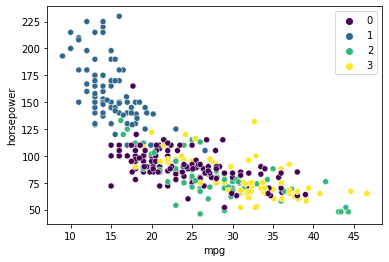

In [23]:
sns.scatterplot(data=df,x='mpg',y='horsepower',hue=cluster_labels,palette='viridis')

Max distance possible = sqrt(N_features)

Explanation : Since we are using min max scaling, the worst case scenario would be (1,1) and (0,0) in which case the distance would be sqrt(2). So for N features it would be sqrt(N)

In [24]:
len(scaled_df.columns)

10

In [25]:
np.sqrt(10) #Max distance possible between two points in this case(due to min max scaling)

3.1622776601683795

distance_threshold is the distance above which clusters wont be merged.

In [26]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

So by setting distance_threshold as zero, we are saying that even if the distance between teh data points are 0 then dont merge them into a cluster

In [27]:
cluster_labels = model.fit_predict(scaled_df)

In [28]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [29]:
linkage_matrix = hierarchy.linkage(model.children_)

* Linkage matrix is in the form [cluster/observation1, cluster/observation2, distance_between_them,number_of_points_in_cluster]

* It can be noticed that as we go down in this matrix, the distance between the points and the number of points in cluster keeps increasing progressively

In [30]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

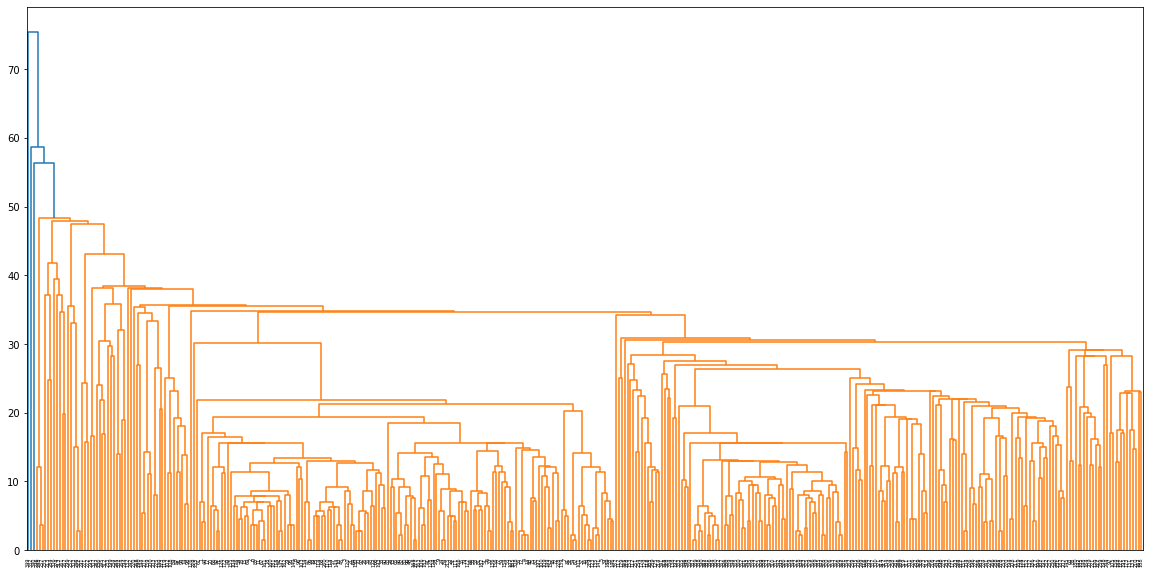

In [53]:
plt.figure(figsize =(20,10))
dendro = dendrogram(linkage_matrix)
plt.savefig('dendro.png')

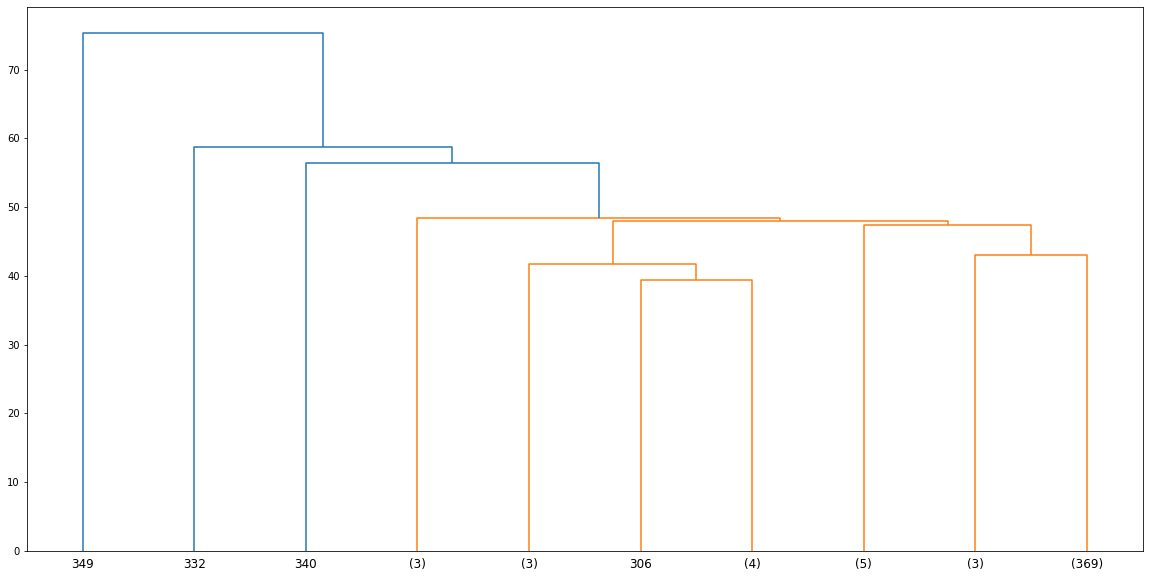

In [54]:
plt.figure(figsize =(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)
plt.savefig('lastp.png')

'truncate_mode' parameter can be used to condense the dendogram

* lastp- The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage

* level - No more than p levels of the dendrogram tree are displayed

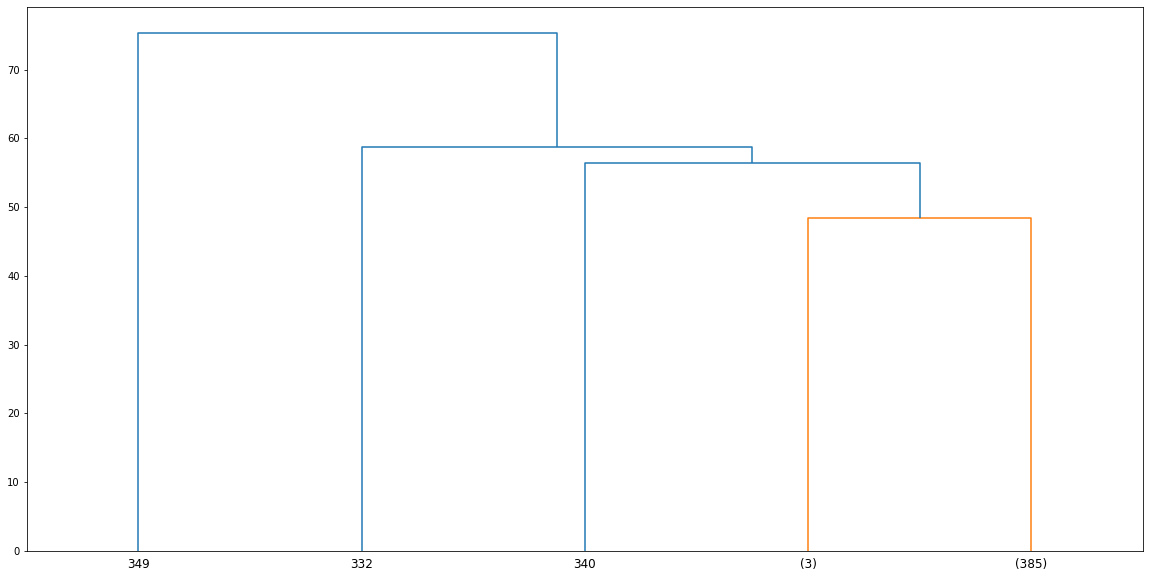

In [55]:
plt.figure(figsize =(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)
plt.savefig('level.png')

By exploring various values for the truncation hyperparameters we can try to arrive at the number of clusters to be used.

However, this visual approach might not be useful for large datasets. hence we lay emphasis on the euclidean distances

Hence, we go for tuning the distance_threshold parameter instead. To do this , we need a range of values over which the distance threshold can be varied.

First, we obtain the thereotical max distance which from earlier we know is sqrt(number of features)

In [33]:
#thereotical max distance
np.sqrt(len(scaled_df.columns))

3.1622776601683795

Now, obtaining the max distance between the actual datapoints in our dataset

In [34]:
scaled_df['mpg'].idxmax()

320

In [35]:
scaled_df['mpg'].idxmin()

28

In [36]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [37]:
distance = np.linalg.norm(car_a-car_b)

In [38]:
distance

2.3852929970374714

From the values obtained, it is fair to assume that 2or 3 would be a reasonable estimate for the distance threshold parameter

In [39]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [40]:
cluster_labels = model.fit_predict(scaled_df)

In [41]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

Obtaining the number of clusters into which the data has been split into

In [42]:
len(set(cluster_labels))

11

In [43]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [44]:
linkage_matrix = hierarchy.linkage(model.children_)

In [45]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

p value is the number of clusters that we obtained just above

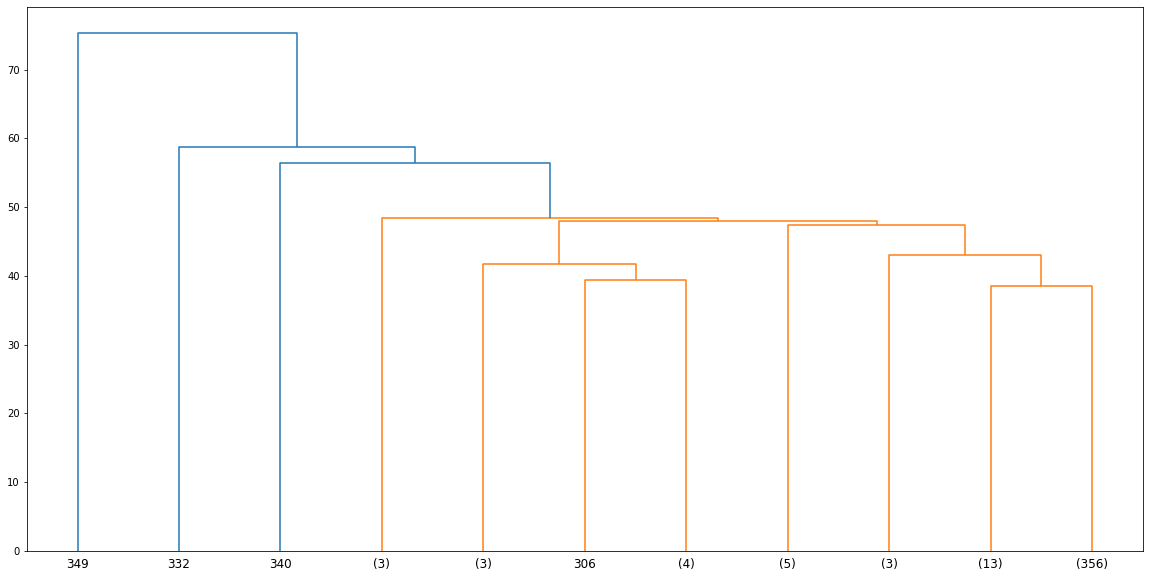

In [56]:
plt.figure(figsize =(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=11)
plt.savefig('tuned_dendro.png')